In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score

In [26]:
# Create our own data
x = 6*np.random.rand(200,1)-3   # np.random.rand(200, 1) generates a 200x1 array of random numbers between 0 and 1.
y = 0.8 * x**2 + 0.9*x +2 + np.random.rand(200,1)

# Equation y=0.8x^2+0.9x+2.  [We try to find W1,W2,b]

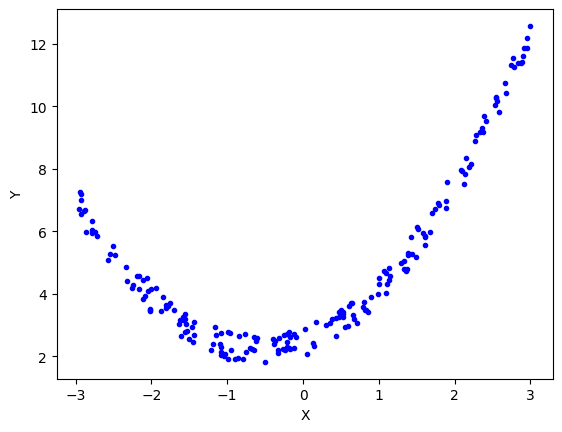

In [27]:
plt.plot(x,y,'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [28]:
# Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [29]:
# Apply linear regression
lr=LinearRegression()

In [30]:
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred=lr.predict(x_test)
r2_score(y_test,y_pred)

-0.043356330021362854

In [32]:
print(lr.coef_)
print(lr.intercept_)

[[1.05059324]]
[4.74375599]


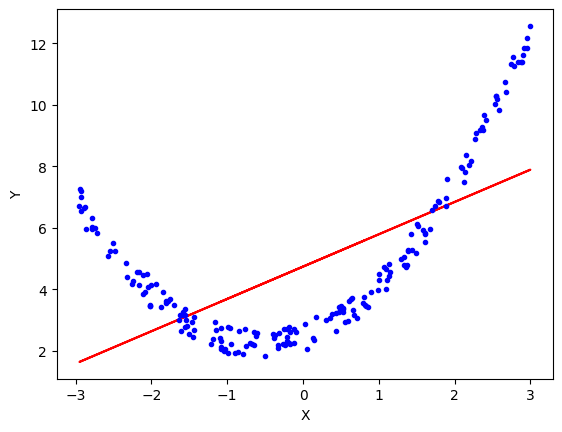

In [33]:
plt.plot(x_train,lr.predict(x_train),color='r')
plt.plot(x,y,'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [34]:
# Apply Polynomial regression
# degree=2
# PolynomialFeatures is a class of preprocessing. We creat a object poly of class PolynomialFeatures
poly=PolynomialFeatures(degree=2)

# We translate oure data [x] to [x^0,x^1,x^2]
x_train_trans=poly.fit_transform(x_train)
x_test_trans=poly.transform(x_test)


In [35]:
print(x_train[0])
print(x_train_trans[0])  
# data [x] to [x^0,x^1,x^2]

[-1.09081792]
[ 1.         -1.09081792  1.18988373]


In [36]:
lr=LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [37]:
y_pr=lr.predict(x_test_trans)

In [38]:
r2_score(y_test,y_pr)

0.984216096600697

In [39]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.90210739 0.79290456]]
[2.52445962]


In [41]:
x_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly=poly.transform(x_new)
y_new=lr.predict(x_new_poly)

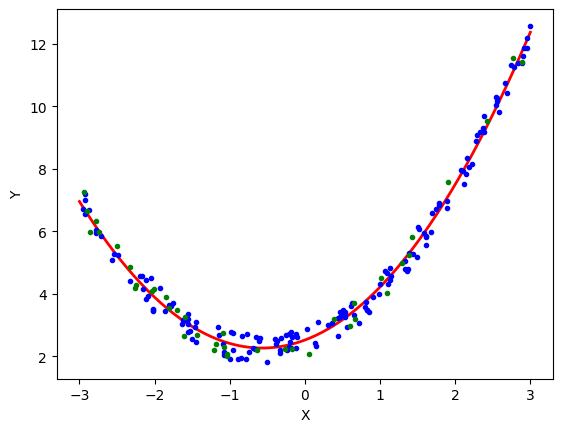

In [42]:
plt.plot(x_new,y_new,'r-',linewidth=2,label='Predictions')
plt.plot(x_train,y_train,'b.',label='Training Points')
plt.plot(x_test,y_test,'g.',label='Testing Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Multiple Linear Regression